In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Data file.csv')
data.head()


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data.shape

(209593, 37)

In [4]:
data.isnull().sum()      # we have complete data, having no null value

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
data.msisdn.nunique()

186243

# here column 'msisdn' is like unique id, so we should drop duplicate entries and it doesn't afftecting output so lets drop entire column

In [7]:
data=data.drop_duplicates('msisdn',keep='first')  

In [8]:
data.drop(['msisdn'],axis=1,inplace=True)

# column pcircle and pdate don't have important information, so lets drop it.

In [9]:
data.drop(['pcircle','pdate'],axis=1,inplace=True)

In [10]:
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [11]:
x=data.drop('label',axis=1)
y=data['label']

In [12]:
y.value_counts()

1    160383
0     25860
Name: label, dtype: int64

<AxesSubplot:>

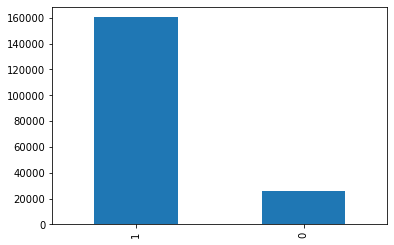

In [13]:
y.value_counts().plot.bar()     #here we can see there is imbalanced data

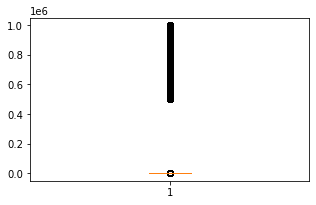

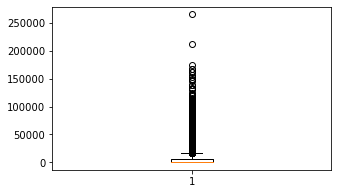

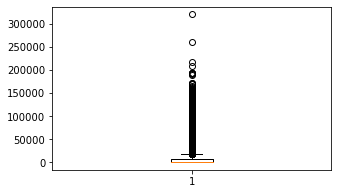

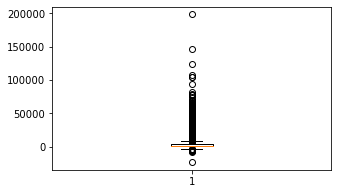

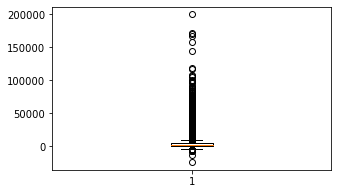

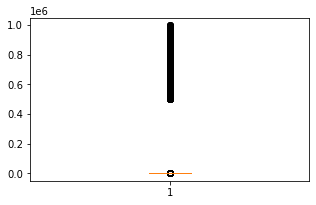

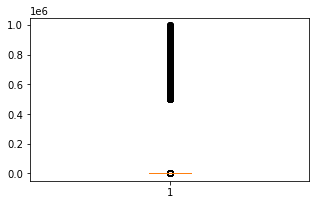

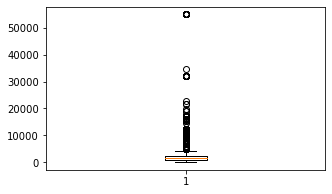

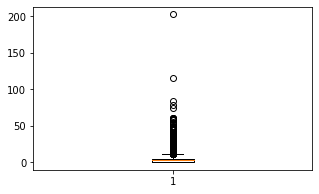

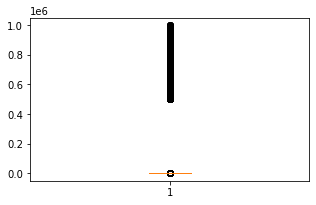

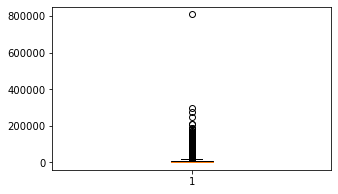

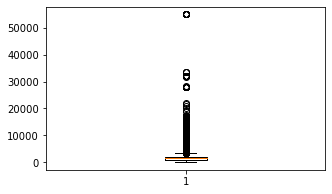

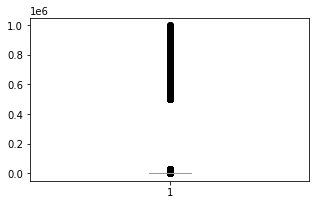

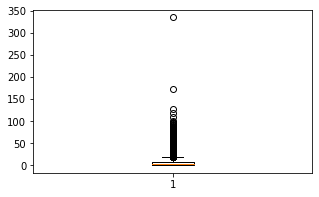

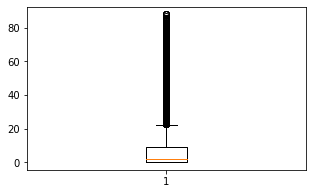

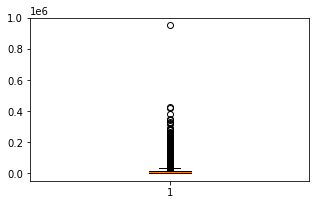

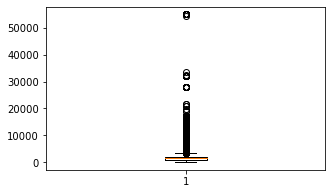

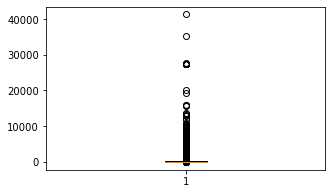

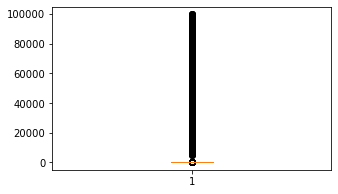

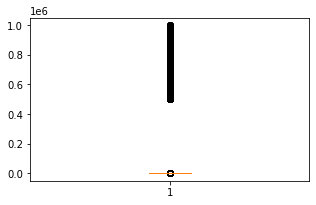

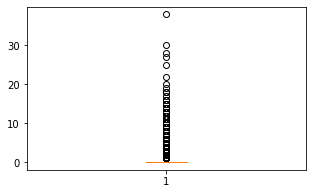

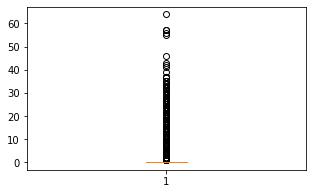

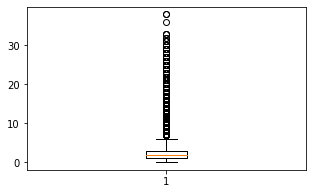

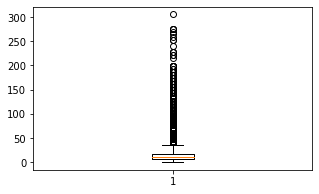

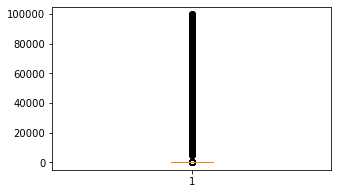

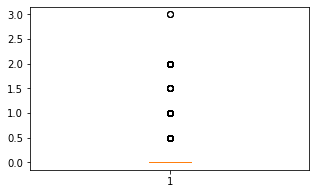

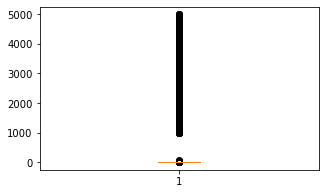

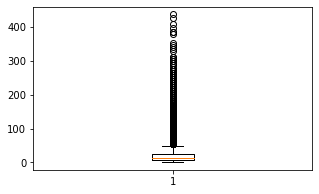

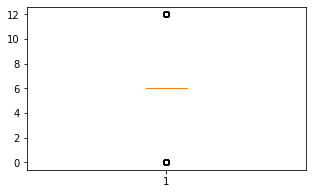

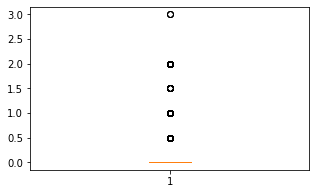

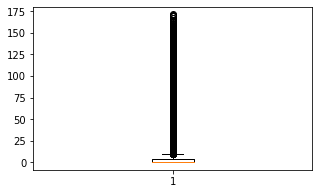

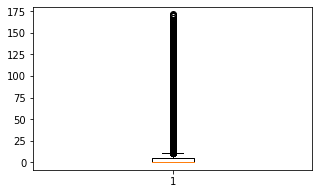

In [14]:
for i in x.columns:
    plt.figure(figsize=(5,3))    # Here we can see that the data is almost an outlier
    plt.boxplot(x[i])
    plt.show()
    

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [19]:
x.describe()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,...,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.000000,186243.00000,186243.000000,186243.000000
mean,8145.172831,5049.834558,5696.623026,2634.459831,3401.366654,3728.482692,3732.953680,2073.202891,3.646295,3710.729377,...,2.514645,16.363525,272.085598,0.056101,17.922651,21.225431,6.675891,0.04826,3.351531,4.327624
std,75865.800335,8758.493684,10340.696921,4291.392727,5720.521590,53744.726961,53563.651356,2415.927330,3.915321,53423.442186,...,2.266677,15.448270,4224.161293,0.222614,223.322525,23.189954,2.093362,0.20545,9.044574,10.619785
min,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,241.000000,38.522000,38.791000,256.000000,288.000000,1.000000,0.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.00000,0.000000,0.000000
50%,522.000000,1332.110667,1360.000000,1036.700000,1281.860000,3.000000,0.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.00000,0.000000,1.000000
75%,979.000000,6710.066667,7229.220000,3247.565000,4070.115000,7.000000,0.000000,2309.000000,5.000000,6.000000,...,3.000000,18.000000,6.000000,0.000000,4.000000,24.000000,6.000000,0.00000,3.666667,4.500000
max,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,...,38.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.00000,171.500000,171.500000


In [20]:
neg_cols=[]
for i in  x.columns:
    if min(x[i])<0:
        neg_cols.append(i)

In [21]:
neg_cols

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'medianmarechprebal30',
 'medianmarechprebal90']

In [22]:
neg_col_name=[]

In [23]:
for i in  neg_cols:
    neg_col_name.append(i+'_is_neg')
    

In [24]:
neg_col_name

['aon_is_neg',
 'daily_decr30_is_neg',
 'daily_decr90_is_neg',
 'rental30_is_neg',
 'rental90_is_neg',
 'last_rech_date_ma_is_neg',
 'last_rech_date_da_is_neg',
 'medianmarechprebal30_is_neg',
 'medianmarechprebal90_is_neg']

In [25]:
for (i,j) in zip(neg_cols,neg_col_name):
    x[j]=np.where(x[i]<0,1,0)
    

## now lets get rid of negatives

In [26]:
x=abs(x)

In [34]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.5,random_state=0)
x_res,y_res=os.fit_resample(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


# from collections import Counter



In [35]:
print('before oversampling= {}'.format(Counter(y_train)))
print('after oversampling= {}'.format(Counter(y_res)))

before oversampling= Counter({1: 128317, 0: 20677})
after oversampling= Counter({1: 128317, 0: 64158})


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_res,y_res)

RandomForestClassifier()

In [37]:
y_pred1=rf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('acc_score------------------------')
print(accuracy_score(y_test,y_pred1))
print('conf_matx-------------------------')
print(confusion_matrix(y_test,y_pred1))
print('clsf_report-------------------------')
print(classification_report(y_test,y_pred1))

acc_score------------------------
0.9020376385943247
conf_matx-------------------------
[[ 2619  2564]
 [ 1085 30981]]
clsf_report-------------------------
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      5183
           1       0.92      0.97      0.94     32066

    accuracy                           0.90     37249
   macro avg       0.82      0.74      0.77     37249
weighted avg       0.89      0.90      0.89     37249



In [55]:
# number of trees in forest
n_estimators=[int(x) for x in np.linspace(10,80,10)]
# number of features to consider at every split
max_features=['auto','sqrt']
# max number of levels in tree
max_depth=[2,5,8]
# min number of sanples requiredn to split node
min_sample_split=[2,5]
# min number of sample required at each leaf node
min_sample_leaf=[1,2,3]

In [56]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_sample_split,
            'min_samples_leaf':min_sample_node                     
           }

In [57]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(rf,param_distributions=param_grid,cv=3,verbose=1,n_jobs=-1,random_state=0)

In [58]:
rs.fit(x_res,y_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   random_state=0, verbose=1)

In [59]:
rs.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 5}

In [62]:
y_pred=rs.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('acc_score------------------------')
print(accuracy_score(y_test,y_pred))
print('conf_matx-------------------------')
print(confusion_matrix(y_test,y_pred))
print('clsf_report-------------------------')
print(classification_report(y_test,y_pred))

acc_score------------------------
0.8477811484872078
conf_matx-------------------------
[[ 3026  2157]
 [ 3513 28553]]
clsf_report-------------------------
              precision    recall  f1-score   support

           0       0.46      0.58      0.52      5183
           1       0.93      0.89      0.91     32066

    accuracy                           0.85     37249
   macro avg       0.70      0.74      0.71     37249
weighted avg       0.86      0.85      0.85     37249

